[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train a YOLOv8 Keypint Detection Model

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/yolov8-keypoint-detection-custom-train)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics.

In this guide, we will walk through how to train a YOLOv8 keypoint detection model.

If you notice that our notebook behaves incorrectly, let us know by [opening an issue on the Roboflow Notebooks repository](https://github.com/roboflow/notebooks/issues).

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading our [YOLOv8 keypoint detection training blog post](https://blog.roboflow.com/train-a-custom-yolov8-pose-estimation-model/).

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Checking that our Colab environment has a GPU
- Installing YOLOv8
- Preparing a dataset
- Training a model
- Running inference on our model
- Calculating the angle of two keypoints

Without further ado, let's get started!

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Wed Oct  9 19:33:25 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   29C    P0              40W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

To install YOL0v8, run the following command:

In [3]:
!pip install ultralytics==8.3.7 -q

import ultralytics
ultralytics.checks()

Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 41.2/235.7 GB disk)


Now, we can import YOLOv8 into our Notebook:

In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## Roboflow Universe

Need data for your project? Before spending time on annotating, check out Roboflow Universe, a repository of open source computer vision datasets. Universe has a page dedicated to keypoint detection datasets.

[Browse available keypoint detection datasets.](https://universe.roboflow.com/search?q=keypoint%20detection)

[![Roboflow Universe](https://media.roboflow.com/notebooks/template/uni-banner-frame.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672878480290)](https://universe.roboflow.com/)



## Prepare a custom dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible. Let us show you how!

### Step 1: Creating project

Before you start, you need to create a Roboflow [account](https://app.roboflow.com/login). Once you do that, you can create a new project in the Roboflow [dashboard](https://app.roboflow.com/). Choose "Keypoint Detection" as your project type.

<img src="https://media.roboflow.com/keypoint/project.png" alt="Keypoint detection selected on the Roboflow Create Project pop up" height="300" />

### Step 2: Uploading images

Next, add the data to your newly created project. You can do it via API or through our [web interface](https://docs.roboflow.com/adding-data/object-detection).

If you drag and drop a directory with a dataset in a supported format, the Roboflow dashboard will automatically read the images and annotations together.

<img src="https://media.roboflow.com/keypoint/upload_images.png" alt="Uploading images to Roboflow" height="300" />

### Step 3: Label Data

If you only have images, you can label them with keypoints in [Roboflow Annotate](https://docs.roboflow.com/annotate).

### Step 4: Generate new dataset version

Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

<img src="https://media.roboflow.com/keypoint/version.png" alt="Generate a dataset version" height="300" />

### Step 5: Export dataset

Once the dataset version is generated, we can download it for use in training a model.

![Generate a dataset version](https://media.roboflow.com/keypoint/export.png)


In [5]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

import roboflow

roboflow.login()

rf = roboflow.Roboflow()

project = rf.workspace("capjamesg").project("glue-keypoint-detection")
dataset = project.version(2).download("yolov8")

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.4 MB/s eta 0:00:00
visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.3.5, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Glue-Keypoint-Detection-2 in yolov8:: 100%|██████████| 280/280 [00:00<00:00, 7049.67it/s]


In [6]:
import yaml

with open(f"{dataset.location}/data.yaml", 'r') as f:
    dataset_yaml = yaml.safe_load(f)
dataset_yaml["train"] = "../train/images"
dataset_yaml["val"] = "../valid/images"
dataset_yaml["test"] = "../test/images"
with open(f"{dataset.location}/data.yaml", 'w') as f:
    yaml.dump(dataset_yaml, f)

## Train a YOLOv8 Keypoint Detection Model

With our dataset downloaded, we can now train a YOLOv8 keypoint detection model. Run the code snippet below to start training your model:

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n-pose.pt')

results = model.train(data=f"{dataset.location}/data.yaml", epochs=100, imgsz=640)

Your model will train for 100 epochs. After training, you can run test your model using an image from your test set.

## Test the Keypoint Detection Model

Let's test our keypoint detection model using [supervision](https://github.com/roboflow/supervision).

In [38]:
model = YOLO('runs/pose/train/weights/best.pt')

import os
import random

random_file = random.choice(os.listdir(f"{dataset.location}/test/images"))
file_name = os.path.join(f"{dataset.location}/test/images", random_file)

results = model(file_name)

print(results[0])


image 1/1 /content/datasets/Glue-Keypoint-Detection-2/test/images/IMG_4913_JPG.rf.cf3773debceb7b53a7f9b26a23ee3e89.jpg: 640x640 2 glues, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: ultralytics.engine.results.Keypoints object
masks: None
names: {0: 'glue'}
obb: None
orig_img: array([[[152, 135, 116],
        [153, 136, 117],
        [154, 137, 118],
        ...,
        [112,  96,  83],
        [112,  96,  83],
        [112,  96,  83]],

       [[153, 136, 117],
        [154, 137, 118],
        [154, 137, 118],
        ...,
        [112,  96,  83],
        [112,  96,  83],
        [112,  96,  83]],

       [[155, 138, 119],
        [155, 138, 119],
        [155, 138, 119],
        ...,
        [112,  96,  83],
        [112,  96,  83],
        [112,  96,  83]],

       ...,

       [[165, 147, 130],
        [166, 

We can visualize our keypoints using the following code:

In [17]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

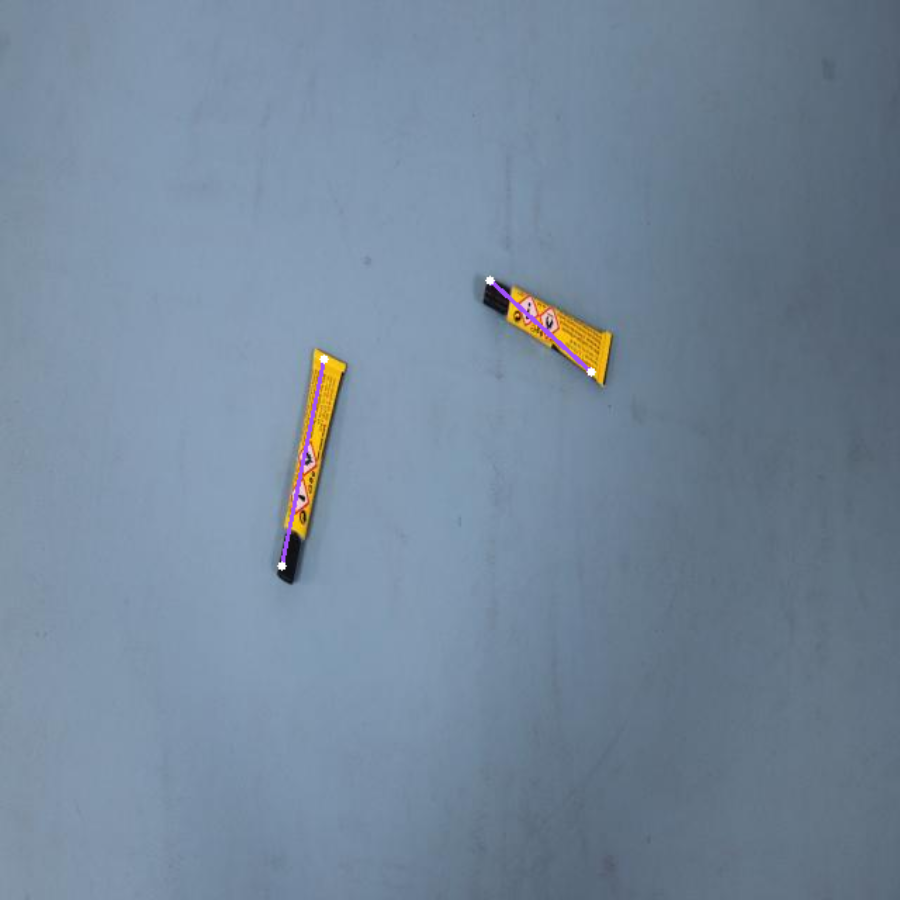

In [42]:
!pip install supervision==0.24.0 -q

import supervision as sv
import cv2

key_points = sv.KeyPoints.from_ultralytics(results[0])


vertex_annotator = sv.VertexAnnotator(radius=3, color=sv.Color.WHITE)
edge_annotator = sv.EdgeAnnotator(thickness=2, edges=[(0, 1)])

annotated_frame = cv2.imread(file_name)
annotated_frame = edge_annotator.annotate(
    scene=annotated_frame,
    key_points=key_points)
annotated_frame = vertex_annotator.annotate(
    scene=annotated_frame,
    key_points=key_points)

annotated_frame = sv.resize_image(
    annotated_frame,
    resolution_wh=(900, 900),
    keep_aspect_ratio=True
)
sv.cv2_to_pillow(annotated_frame)

Our model successfully identified keypoints in the image.

## Calculate Keypoint Angle

When you are working with keypoints, you may want to calculate the angle between two keypoints.

In this guide, we want to calculate whether the tip of the keypoint is at a 0 degree (or close to 0, within a set tolerance) angle to the base of the tip. This would indicate the glue stick is upright.

To do so, we can use the following code:

In [41]:
import math

def check_angle_within_tolerance(xy, tolerance_degrees=5):
    p1, p2 = xy[0]

    dx = p2[0] - p1[0]
    dy = p2[1] - p1[1]

    angle_degrees = math.degrees(math.atan2(abs(dy), abs(dx))) if dx != 0 else 90

    return abs(angle_degrees - 0) <= tolerance_degrees

is_glue_upright = check_angle_within_tolerance(results[0].keypoints.xy)
is_glue_upright

False

# Deploy Your Model to the Edge

In addition to using the Roboflow hosted API for deployment, you can use [Roboflow Inference](https://inference.roboflow.com), an open source inference solution that has powered millions of API calls in production environments. Inference works with CPU and GPU, giving you immediate access to a range of devices, from the NVIDIA Jetson to TRT-compatible devices to ARM CPU devices.

With Roboflow Inference, you can self-host and deploy your model on-device.

To run inference on device, first install Inference:

```bash
pip install inference inference-sdk
```

Then, create a client through which to run your model:

```python
from inference_sdk import InferenceHTTPClient, InferenceConfiguration

project_id = ""
model_version = 1
confidence = 0.75

custom_configuration = InferenceConfiguration(confidence_threshold=confidence)

client = InferenceHTTPClient(
    api_url="http://localhost:9001",
    api_key=os.environ["API_KEY"],
)

client.select_api(model_version)
```


Above, set your Roboflow workspace ID, model ID, and API key.

- [Find your workspace and model ID](https://docs.roboflow.com/api-reference/workspace-and-project-ids?ref=blog.roboflow.com)
- [Find your API key](https://docs.roboflow.com/api-reference/authentication?ref=blog.roboflow.com#retrieve-an-api-key)

Then, you can run inference on a file:

```python
results = client.infer(image_url, model_id=f"{project_id}/{model_version}")

print(predictions)
```

_To use your YOLOv8 model commercially with Inference, you will need a Roboflow Enterprise license, through which you gain a pass-through license for using YOLOv8. An enterprise license also grants you access to features like advanced device management, multi-model containers, auto-batch inference, and more._

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.